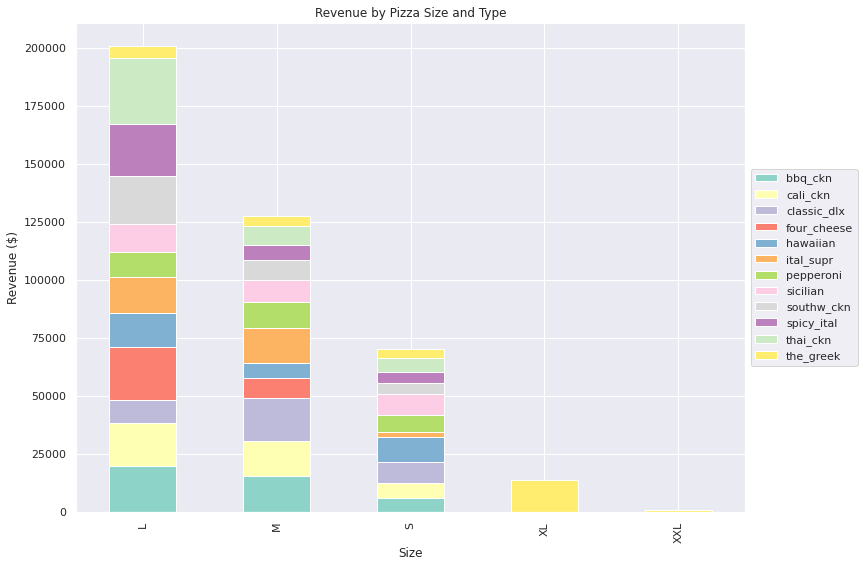

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


df = pd.read_csv('Resultsd.csv')


total_revenue_by_type = df.groupby('pizza_type_id')['price'].sum()


top_12_types = total_revenue_by_type.nlargest(12).index


df = df[df['pizza_type_id'].isin(top_12_types)]


base_colors = sns.color_palette('Set3', n_colors=len(top_12_types))


darker_colors = [sns.dark_palette(color, n_colors=1, reverse=True)[0] for color in base_colors]


revenue_by_size_type = df.groupby(['size', 'pizza_type_id'])['price'].sum().reset_index()


revenue_pivot = revenue_by_size_type.pivot(index='size', columns='pizza_type_id', values='price')


revenue_pivot = revenue_pivot[revenue_pivot.sum().sort_values(ascending=False).index]


revenue_pivot = revenue_pivot.apply(lambda x: x.sort_values(ascending=True), axis=1)


ax = revenue_pivot.plot(kind='bar', stacked=True, color=colors)


plt.title('Revenue by Pizza Size and Type')
plt.xlabel('Size')
plt.ylabel('Revenue ($)')


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('CHART14.png', dpi=300, bbox_inches='tight')
